# Local Search Implementation on Diagonal Magic Cube
## by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *


from Simulated import *
from hill_climb import *
from random_restart import *
from genetic import *
from geneticAlgoJere import *

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [67,18,119,106,5],
    [116,17,14,73,95],
    [40,50,81,65,79],
    [56,120,55,49,35],
    [36,110,46,22,101]
],
# Level 2
[
    [66,72,27,102,48],
    [26,39,92,44,114],
    [32,93,88,83,19],
    [113,57,9,62,74],
    [78,54,99,24,60]
],
# Level 3
[
    [42,111,85,2,75],
    [30,118,21,123,23],
    [89,68,63,58,37],
    [103,3,105,8,96],
    [51,15,41,124,84]
],
# Level 4
[
    [115,98,4,1,97],
    [52,64,117,69,13],
    [107,43,38,33,94],
    [12,82,34,87,100],
    [29,28,122,125,11]
],
# Level 5
[
    [25,16,80,104,90],
    [91,77,71,6,70],
    [47,61,45,76,86],
    [31,53,112,109,10],
    [121,108,7,20,59]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 0.0


In [5]:
goal_cube.print_tensor()

Level 1: 

[ 67  18 119 106   5]
[116  17  14  73  95]
[40 50 81 65 79]
[ 56 120  55  49  35]
[ 36 110  46  22 101]

Level 2: 

[ 66  72  27 102  48]
[ 26  39  92  44 114]
[32 93 88 83 19]
[113  57   9  62  74]
[78 54 99 24 60]

Level 3: 

[ 42 111  85   2  75]
[ 30 118  21 123  23]
[89 68 63 58 37]
[103   3 105   8  96]
[ 51  15  41 124  84]

Level 4: 

[115  98   4   1  97]
[ 52  64 117  69  13]
[107  43  38  33  94]
[ 12  82  34  87 100]
[ 29  28 122 125  11]

Level 5: 

[ 25  16  80 104  90]
[91 77 71  6 70]
[47 61 45 76 86]
[ 31  53 112 109  10]
[121 108   7  20  59]



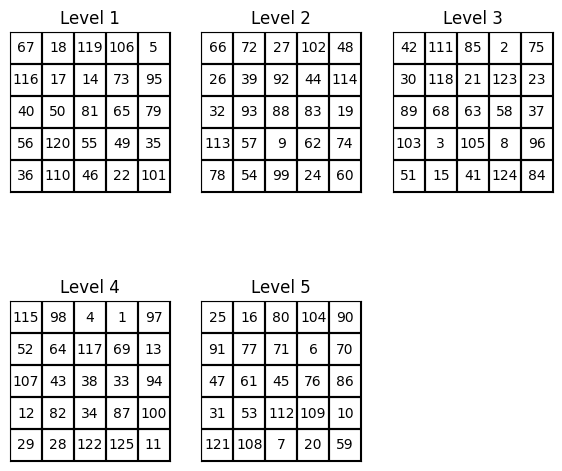

In [6]:
goal_cube.plot_cube()

### Problem Cube Initialization

In [7]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

## Local Seach Implementation

### Random Restart Hill-Climbing


In [8]:
# RR_cube = copy.deepcopy(cube)

In [9]:
# RR_cube.plot_cube()

In [10]:
# RR = Random_restart(cube=RR_cube,max_restart=100)

In [11]:
# RR.results()

In [12]:
# print(f"Random Restart Best Value: {RR.best_value}\n")
# print(f"Ideal Value: {obj_func_goal}\n")
# print(f"differences from ideal: {RR.best_value - obj_func_goal}")

In [13]:
# RR.final_state().plot_cube()

### Simulated Annealing

#### Initial State

In [14]:
# SA_cube = copy.deepcopy(cube)

In [15]:
# SA_cube.plot_cube()

In [16]:
# print(f"intial objective function: {SA_cube.objective_function(square_error=True)}")

#### Searching

In [17]:
# SA = Simulated(cube=SA_cube,tmax=500000,tmin=0,step_max=10000,cooling_schedule="quadratic",alpha=0.99,greedy_move=True,function_error='squared')

#### Result

In [18]:
# SA.results()

In [19]:
# SA.final_state().plot_cube()

#### Plot

Best Energy 

In [20]:
# SA.hist_plot(Best_energy=True,Curr_energy=True,freq_stuck=True,title="Simulated Annealing Energy Plot")

Probability

In [21]:
# SA.prob_plot(title="Simulated Annealing Probability Plot")

### Genetic Algorithm


In [22]:
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 0.0


In [ ]:
GAcube = copy.deepcopy(cube)
GAcube.plot_cube()

In [24]:
genetic_algo = GeneticAlgoNJ(
    cube=GAcube,
    population_size=500,
    generation_rate=300,
    mutation_rate=0.1,
    elitism_size=10
)

In [25]:
genetic_algo.evolve()

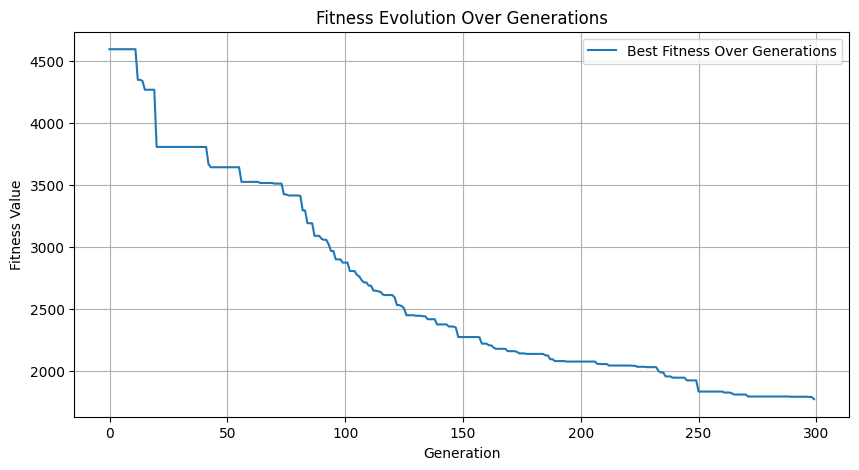


Best Fitness: 1770.0


In [26]:
best_cube, best_fitness = genetic_algo.get_best_solution()

# Plot the fitness evolution over generations
genetic_algo.hist_plot()

print("\nBest Fitness:", best_fitness)

Generating initial population...
Initial Population Generated with size:  500
Generation:  1 Fitness:  4709.0
Generation:  2 Fitness:  4499.0
Generation:  3 Fitness:  4299.0
Generation:  4 Fitness:  4104.0
Generation:  5 Fitness:  3932.0
Generation:  6 Fitness:  3678.0
Generation:  7 Fitness:  3510.0
Generation:  8 Fitness:  3408.0
Generation:  9 Fitness:  3280.0
Generation:  10 Fitness:  3176.0
Generation:  11 Fitness:  3074.0
Generation:  12 Fitness:  2978.0
Generation:  13 Fitness:  2882.0
Generation:  14 Fitness:  2802.0
Generation:  15 Fitness:  2734.0
Generation:  16 Fitness:  2631.0
Generation:  17 Fitness:  2490.0
Generation:  18 Fitness:  2357.0
Generation:  19 Fitness:  2222.0
Generation:  20 Fitness:  2148.0
Generation:  21 Fitness:  2072.0
Generation:  22 Fitness:  1908.0
Generation:  23 Fitness:  1856.0
Generation:  24 Fitness:  1795.0
Generation:  25 Fitness:  1697.0
Generation:  26 Fitness:  1595.0
Generation:  27 Fitness:  1540.0
Generation:  28 Fitness:  1473.0
Generat

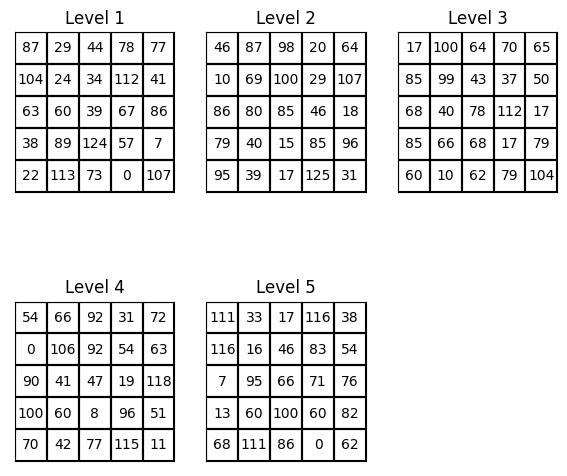

Fitness: 266.0


In [27]:
GA=GeneticAlgo(cube=copy.deepcopy(cube), goal_cube=goal_cube, population_size=500, generation_rate=300)

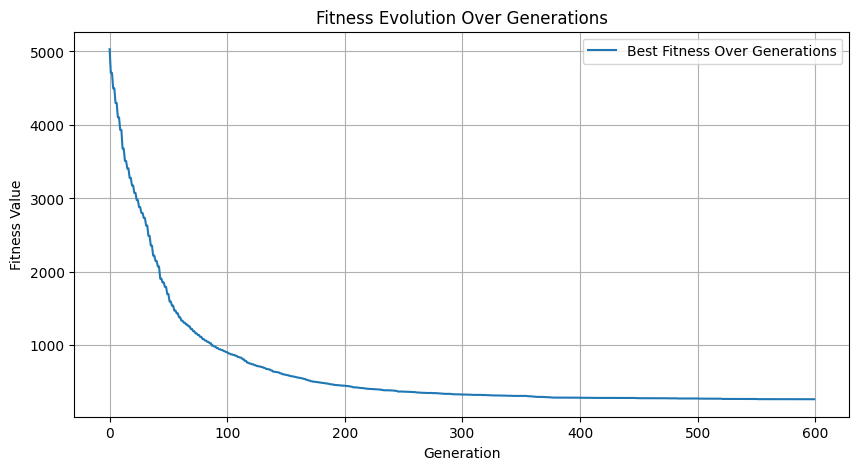

In [28]:
GA.hist_plot()